# Index

## I. Clean & Format Data 

   1. Reformat Duration Time - convert time to minutes  
       a. Re-run EDA on Duration
   2. Investigate 0 Views and/or 0 Likes  
       a. First Pass - Keep  
       b. Second Pass - Remove
   3. Create column for month  
       a. Second Pass - Convert to String
   4. Create column for # of Tags
   5. Create Video Age Months 
   6. Convert Published At Hour to String (New)
   7. Format tags (Moved here from Notebook 4)
   8. Remove shorts - create video only df for now
   9. Bin Views/mo and Likes/mo - by median
   10. Save final dataframe (videos only)
   
   
   

## Editor Notes

This is an iterated 2nd edition of this notebook. Changes made after running the first model:

- Get hour - cvrt to string
- Get months - cvrt to string
- Remove videos 0 duration
- Remove videos 0 likes
- Tag formatting (moved from Notebook 4)

In [418]:
#import libraries
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import isodate
from datetime import datetime, timedelta
import pytz
import re

In [419]:
#bring in data
data_clean = pd.read_csv('../data/data_clean_pt1.csv', index_col = 0)

In [420]:
data_clean.head(3)

,Video URL,Title,Description,Published At,Channel ID,Channel Title,Tags,Category ID,Default Language,Duration,View Count,Like Count,Dislike Count,Favorite Count,Comment Count,Comments Disabled,Ratings Disabled,Duration Time Format,Video Age Days,Views per Month,Likes per Month,Category,No Description,No Tags
0,https://www.youtube.com/watch?v=WBeMRU1Tbgs,The Perfect ASMR Video,Well... that's up for you to decide!! How did ...,2022-09-10 22:00:19+00:00,UCE6acMV3m35znLcf0JGNn7Q,Gibi ASMR,"gibi, asmr, gibi asmr, perfect, video, for sle...",24,en,PT1H12M56S,5668987,84955,0,0,2588,False,False,01:12:56,728,236856.714171,3549.516369,Entertainment,0,0
1,https://www.youtube.com/watch?v=vvcUJEQnen4,ASMR Victorian Medical Roleplay 🩺 Medical Exam,Meet with the remarkable Doctor Cosmos and his...,2022-09-13 19:45:00+00:00,UC20BrZXv7OC6JyALCZN-0Ig,Tinglesmith ASMR,,22,en,PT26M3S,1973546,27525,0,0,984,False,False,00:26:03,725,82798.194253,1154.784483,People & Blogs,0,1
2,https://www.youtube.com/watch?v=BNxAGgvb60w,The Tingle Writer 🖋️ASMR (Cinematic Roleplay),"The Tingle Writer, an #ASMR #Cinematic #Rolepl...",2022-09-25 21:00:11+00:00,UC4d18IlLmw0utmVxIjSadLQ,Made In France ASMR,"asmr, sleep, binaural, satisfying, tingles, tr...",24,en,PT59M,3337304,111716,0,0,3530,False,False,00:59:00,713,142369.794296,4765.818139,Entertainment,0,0


In [421]:
data_clean.shape

(3956, 24)

# I. Clean & Format Data

## 1. Reformat Time

In [422]:
#replace Duration Time Format with new formula for converting Duration to minutes
#function to convert duration to hh:mm:ss format
#change to seconds

def convert_iso8601_to_minutes(duration):
    # Special case for zero-duration "P0D"
    if duration == "P0D":
        return 0

    # Use regex to extract hours, minutes, and seconds
    pattern = re.compile(r'PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?')
    matches = pattern.match(duration)
    
    # Check if the pattern matched
    if matches is None:
        raise ValueError(f"Invalid duration format: {duration}")
    
    # Extract hours, minutes, and seconds (default to 0 if missing)
    hours = int(matches.group(1)) if matches.group(1) else 0
    minutes = int(matches.group(2)) if matches.group(2) else 0
    seconds = int(matches.group(3)) if matches.group(3) else 0
    
    # Convert everything to minutes
    total_minutes = hours * 60 + minutes + seconds / 60
    return round(total_minutes, 2)

In [423]:
data_clean['Duration Time Format'] = data_clean['Duration'].apply(convert_iso8601_to_minutes)

In [424]:
data_clean.head()

,Video URL,Title,Description,Published At,Channel ID,Channel Title,Tags,Category ID,Default Language,Duration,View Count,Like Count,Dislike Count,Favorite Count,Comment Count,Comments Disabled,Ratings Disabled,Duration Time Format,Video Age Days,Views per Month,Likes per Month,Category,No Description,No Tags
0,https://www.youtube.com/watch?v=WBeMRU1Tbgs,The Perfect ASMR Video,Well... that's up for you to decide!! How did ...,2022-09-10 22:00:19+00:00,UCE6acMV3m35znLcf0JGNn7Q,Gibi ASMR,"gibi, asmr, gibi asmr, perfect, video, for sle...",24,en,PT1H12M56S,5668987,84955,0,0,2588,False,False,72.93,728,236856.714171,3549.516369,Entertainment,0,0
1,https://www.youtube.com/watch?v=vvcUJEQnen4,ASMR Victorian Medical Roleplay 🩺 Medical Exam,Meet with the remarkable Doctor Cosmos and his...,2022-09-13 19:45:00+00:00,UC20BrZXv7OC6JyALCZN-0Ig,Tinglesmith ASMR,,22,en,PT26M3S,1973546,27525,0,0,984,False,False,26.05,725,82798.194253,1154.784483,People & Blogs,0,1
2,https://www.youtube.com/watch?v=BNxAGgvb60w,The Tingle Writer 🖋️ASMR (Cinematic Roleplay),"The Tingle Writer, an #ASMR #Cinematic #Rolepl...",2022-09-25 21:00:11+00:00,UC4d18IlLmw0utmVxIjSadLQ,Made In France ASMR,"asmr, sleep, binaural, satisfying, tingles, tr...",24,en,PT59M,3337304,111716,0,0,3530,False,False,59.00,713,142369.794296,4765.818139,Entertainment,0,0
3,https://www.youtube.com/watch?v=UPn3GAzLwEw,Welcome Back Questionnaire (Dystopian ASMR),This is probably one of the most non-event ASM...,2022-09-10 20:00:05+00:00,UC4eO8gplCQQqD8yvuey1TxQ,Jimち ASMR,"Asmr, asmr for sleep, relaxing sounds, jim chi...",26,en,PT28M25S,133462,3692,0,0,129,False,False,28.42,728,5576.193910,154.255952,Howto & Style,0,0
4,https://www.youtube.com/watch?v=fMIAKg68tMA,1 Hour Of ASMR Tingles For Deep Sleep,My longest video and biggest trigger assortmen...,2022-09-25 22:00:15+00:00,UCM5z4re0CofPJJTp1Uocb9Q,Safe Space ASMR,"1 hour asmr, one hour of asmr, one hour of asm...",22,en,PT1H14M13S,238233,2936,0,0,124,False,False,74.22,713,10163.048738,125.250117,People & Blogs,0,0


In [425]:
data_clean[data_clean['Duration Time Format'] == 0]

,Video URL,Title,Description,Published At,Channel ID,Channel Title,Tags,Category ID,Default Language,Duration,View Count,Like Count,Dislike Count,Favorite Count,Comment Count,Comments Disabled,Ratings Disabled,Duration Time Format,Video Age Days,Views per Month,Likes per Month,Category,No Description,No Tags
97,https://www.youtube.com/watch?v=fNjQBXADm44,"🔴 Heavy Rain on a Tin Roof for Sleeping 24/7, ...",Sleep instantly within 3 minutes with heavy ra...,2022-09-21 20:53:20+00:00,UC1r9yJErJiT3hOp5gW_JKUw,Danny Louis,"Heavy Rain, Rain on a Tin Roof, Heavy Rain on ...",24,en,P0D,8666495,40507,0,0,0,False,False,0.0,717,3.676512e+05,1718.393189,Entertainment,0,0
215,https://www.youtube.com/watch?v=0V0SKiiFZMs,🔴 Heavy Rain and Thunder Sounds for Sleeping -...,My first classy Black Screen Heavy Rain and Th...,2022-10-11 18:12:00+00:00,UCa6DBGeztqfXOwcpUnk0Ccg,Pure Sleeping Vibes,"heavy rain and thunder sounds for sleeping, th...",10,en,P0D,26742647,62104,0,0,0,False,False,0.0,697,1.167033e+06,2710.181731,Music,0,0
743,https://www.youtube.com/watch?v=iB-SWxBB9sQ,Pioggia Rilassante per Dormire - Il 99% si add...,Pioggia Rilassante per Dormire - Il 99% si add...,2022-12-26 02:52:33+00:00,UCovgsuC0UGmxIYAMPS6Fu3w,Suoni Naturali,"pioggia per dormire, pioggia, suoni per dormir...",22,en,P0D,6575928,31217,0,0,0,False,False,0.0,621,3.220899e+05,1529.013017,People & Blogs,0,0
917,https://www.youtube.com/watch?v=9PgkeuyY4hs,Rain Sounds & Relaxing Music 24/7 - Piano Musi...,Rain Sounds & Relaxing Music 24/7 - Piano Musi...,2023-01-03 14:02:12+00:00,UCb1ANUIW7arUUDI-Mwz65rw,OCB Relax Music,"study music, soothing music, morning music, be...",10,en-US,P0D,2791770,14848,0,0,0,False,False,0.0,613,1.385258e+05,736.748233,Music,0,0
968,https://www.youtube.com/watch?v=ELFWMkr6Z5Y,🔴 LIVE Oldies playing in another room and it's...,Support the stream: https://streamelements.com...,2023-02-03 02:38:31+00:00,UCOVcAiUMS7RZ6RVUcrwAYXA,Nemo's Dreamscapes,"nemos dreamscapes, oldies music playing in ano...",10,en,P0D,1163709,19142,0,0,0,False,False,0.0,582,6.081812e+04,1000.405212,Music,0,0
1474,https://www.youtube.com/watch?v=qbtTgKNlD_k,EXTREME Rain & Thunder in Hidden House inside ...,Embark on a journey of serenity as you prepare...,2023-04-05 18:16:44+00:00,UCmla4OjsAqsyAbjS5XYqfPg,Easy Sounds & Relaxation Channel,"rain on cabin, porch rain, extreme rain, sleep...",22,en,P0D,2885138,17965,0,0,0,False,False,0.0,521,1.684382e+05,1048.820377,People & Blogs,0,0
1680,https://www.youtube.com/watch?v=B3sOZOZVccQ,"🔴 Box Fan - Low Speed, Black Screen 💨⬛ • Live ...",🙋‍♂️ Welcome to my live stream! Please read on...,2023-05-21 03:09:15+00:00,UCQPzVxdgmiNeYjzMFQpPhdQ,DJ Grossman,"white noise, tinnitus, relax, focus, sleep, bo...",10,en-US,P0D,2033862,4390,0,0,0,False,False,0.0,475,1.302385e+05,281.114035,Music,0,0
1893,https://www.youtube.com/watch?v=V1xk45ELHCA,Fall Asleep In Less Than 3 Minutes ★︎ Healing ...,Fall Asleep In Less Than 3 Minutes ★︎ Healing ...,2023-07-19 01:57:37+00:00,UCJrjftl82EHZ-9JhlY0olvw,Weightless Soul,"Weightless Soul, sleep music, relaxing music s...",10,en,P0D,3929113,23842,0,0,0,False,False,0.0,416,2.872849e+05,1743.255208,Music,0,0
1894,https://www.youtube.com/watch?v=RqSafuTNHHQ,【ASMR】「焚き火+寝息」リラックスして集中できる癒やしBGMライブ配信【24/7 liv...,▼LINE公式アカウント\nhttps://bit.ly/3pSu3Mw\nお仕事のお悩みに...,2023-07-14 23:25:41+00:00,UCyhccrfXKUoGGT8cuAJEGXw,なるはやちゃんねる,"男性向け, 男性向けボイス, シチュエーションボイス, シチュボ, ASMR, 慰め, 励ま...",10,ja,P0D,72484,892,0,0,0,False,False,0.0,421,5.236869e+03,64.445764,Music,0,0
1898,https://www.youtube.com/watch?v=6GpTynHzXoM,Fall Into Sleep INSTANTLY ★︎ Healing of Stress...,Fall Into Sleep INSTANTLY ★︎ Healing of Stress...,2023-07-21 08:48:05+00:00,UCbzMkkVmcheEy2-1ieyCsTg,Weightless Mind,"Weightless Mind, sleep music, relaxing music s...",10,en,P0D,3235703,20954,0,0,0,False,False,0.0,414,2.377278e+05,1539.494767,Music,0,0


In [426]:
#looks like some videos with 0 duration are live
#pop of 39 videos in this batch

In [427]:
#checking for shorts

data_clean[data_clean['Duration Time Format'] <= 1]

,Video URL,Title,Description,Published At,Channel ID,Channel Title,Tags,Category ID,Default Language,Duration,View Count,Like Count,Dislike Count,Favorite Count,Comment Count,Comments Disabled,Ratings Disabled,Duration Time Format,Video Age Days,Views per Month,Likes per Month,Category,No Description,No Tags
8,https://www.youtube.com/watch?v=jalPaPGoZQQ,ASMR Aesthetic Journaling 🧡 Orange Theme #shor...,ASMR Aesthetic Journaling 🧡 Orange Theme #shor...,2022-09-16 04:49:18+00:00,UCWBYtp1F0-6cjMaWykmBvyA,The Crafty Lefty,"asmr, asmr for sleep, asmr journal, asmr sleep...",22,en,PT1M,46356176,1838202,0,0,5946,False,False,1.00,722,1.952909e+06,77440.412050,People & Blogs,0,0
15,https://www.youtube.com/watch?v=rtwG_4mZ40Q,Orange ASMR Snacks vs Cavities!?,Let's Find Out If Orange ASMR Snacks Will Caus...,2022-09-22 11:15:05+00:00,UC7u9o8BHiJyH2_cef_nC7tQ,Dental Digest,,22,en,PT36S,134730714,3507929,0,0,5734,False,False,0.60,716,5.723546e+06,149021.657938,People & Blogs,0,1
21,https://www.youtube.com/watch?v=HZxhGfHSbR4,(ASMR) 3 Bets You Will ALWAYS Win! #Shorts,Here are a few EASY bets to try on your friend...,2022-09-22 20:30:01+00:00,UCyoTDnXaBFX4KOG9KyvdPFw,Dido ASMR,"ASMR, ASMR Whisper, Whispering, ASMR mouth sou...",24,en-GB,PT57S,445243,37658,0,0,220,False,False,0.95,716,1.891454e+04,1599.763734,Entertainment,0,0
22,https://www.youtube.com/watch?v=JOV89_Renos,"ASMR eating spicy food | asmr eating noodles, ...","#asmr #asmreating #mukbang\nasmr,\nasmr eating...",2022-09-05 14:15:02+00:00,UCxIqzFyychUsLlSC1-y8IEw,Malich ASMR,"asmr eating, asmr eating spicy food, asmr eati...",22,en,PT26S,14604820,554225,0,0,1956,False,False,0.43,733,6.060436e+05,22998.195202,People & Blogs,0,0
23,https://www.youtube.com/watch?v=FhiuR3t0Hig,⚡1 Minute ASMR FAST Makeup on YOUR FACE,Hey friends ! \n\nMuch love 💕 \n\nYou can also...,2022-09-06 14:37:03+00:00,UCIS4j6QTByiOBhn-5IhtaGw,Helvetica ASMR,#asmr #asmrspa #asmrskincare #skincare,24,en-US,PT1M,1493748,36460,0,0,352,False,False,1.00,732,6.206945e+04,1515.015938,Entertainment,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,https://www.youtube.com/watch?v=swMb7x7RgSw,#asmr @AsmrWD 신기한물먹방 #ASMRDRINKING #asmreating...,@AsmrWD \n#asmrdrinking,2024-07-18 08:25:00+00:00,UCbbiEt2oAN3F5tJwAHOIPbA,Asmr 세계 음주,,22,en,PT1M,5883083,149682,0,0,109,False,False,1.00,51,3.508701e+06,89271.127451,People & Blogs,0,1
3949,https://www.youtube.com/watch?v=AhCAwMC8tKc,ASMR Homeless amazıng transformation #barber #...,#barber #barbershop #haircut #hairstyle #hairs...,2024-07-23 03:31:23+00:00,UCyfyGaeTtRpvtOwrULRdcew,Asmr homeless tv,Homeless asmr,22,en,PT58S,278625,2157,0,0,9,False,False,0.97,46,1.842357e+05,1426.277174,People & Blogs,0,0
3951,https://www.youtube.com/watch?v=xp5GeigYdq0,ASMR SELF CARE NIGHT 🍒🌸 #asmr #shorts #nails,,2024-07-18 21:22:01+00:00,UCjvt48MCuwaO-s_Ur0i4V5A,Katie’s Nails,,22,en,PT59S,341754,16778,0,0,49,False,False,0.98,51,2.038239e+05,10006.486928,People & Blogs,1,1
3952,https://www.youtube.com/watch?v=hx7xGsC6eEw,Midnight Asmr Super Chill with Cute Order | Mẫ...,,2024-07-29 15:49:17+00:00,UC2hqpOywcs4s8MjBCPYno8g,Mẫn Mẫn Miladen Official,,22,en,PT1M,179243,9279,0,0,337,False,False,1.00,40,1.362994e+05,7055.906250,People & Blogs,1,1


In [428]:
#2266- same number as returned earlier

In [429]:
#rename column
data_clean2 = data_clean.rename(columns={'Duration Time Format': 'Duration Minutes'})

In [430]:
pd.set_option('display.max_columns', None)
data_clean2.head()

,Video URL,Title,Description,Published At,Channel ID,Channel Title,Tags,Category ID,Default Language,Duration,View Count,Like Count,Dislike Count,Favorite Count,Comment Count,Comments Disabled,Ratings Disabled,Duration Minutes,Video Age Days,Views per Month,Likes per Month,Category,No Description,No Tags
0,https://www.youtube.com/watch?v=WBeMRU1Tbgs,The Perfect ASMR Video,Well... that's up for you to decide!! How did ...,2022-09-10 22:00:19+00:00,UCE6acMV3m35znLcf0JGNn7Q,Gibi ASMR,"gibi, asmr, gibi asmr, perfect, video, for sle...",24,en,PT1H12M56S,5668987,84955,0,0,2588,False,False,72.93,728,236856.714171,3549.516369,Entertainment,0,0
1,https://www.youtube.com/watch?v=vvcUJEQnen4,ASMR Victorian Medical Roleplay 🩺 Medical Exam,Meet with the remarkable Doctor Cosmos and his...,2022-09-13 19:45:00+00:00,UC20BrZXv7OC6JyALCZN-0Ig,Tinglesmith ASMR,,22,en,PT26M3S,1973546,27525,0,0,984,False,False,26.05,725,82798.194253,1154.784483,People & Blogs,0,1
2,https://www.youtube.com/watch?v=BNxAGgvb60w,The Tingle Writer 🖋️ASMR (Cinematic Roleplay),"The Tingle Writer, an #ASMR #Cinematic #Rolepl...",2022-09-25 21:00:11+00:00,UC4d18IlLmw0utmVxIjSadLQ,Made In France ASMR,"asmr, sleep, binaural, satisfying, tingles, tr...",24,en,PT59M,3337304,111716,0,0,3530,False,False,59.00,713,142369.794296,4765.818139,Entertainment,0,0
3,https://www.youtube.com/watch?v=UPn3GAzLwEw,Welcome Back Questionnaire (Dystopian ASMR),This is probably one of the most non-event ASM...,2022-09-10 20:00:05+00:00,UC4eO8gplCQQqD8yvuey1TxQ,Jimち ASMR,"Asmr, asmr for sleep, relaxing sounds, jim chi...",26,en,PT28M25S,133462,3692,0,0,129,False,False,28.42,728,5576.193910,154.255952,Howto & Style,0,0
4,https://www.youtube.com/watch?v=fMIAKg68tMA,1 Hour Of ASMR Tingles For Deep Sleep,My longest video and biggest trigger assortmen...,2022-09-25 22:00:15+00:00,UCM5z4re0CofPJJTp1Uocb9Q,Safe Space ASMR,"1 hour asmr, one hour of asmr, one hour of asm...",22,en,PT1H14M13S,238233,2936,0,0,124,False,False,74.22,713,10163.048738,125.250117,People & Blogs,0,0


In [431]:
data_clean2.shape

(3956, 24)

### Decision

In my first regression, I would like to run one on videos only (not including shorts). At the end of this data cleaning, I will create a separate dataset for videos only.

## 2. Investigate 0 Views and/or 0 Likes

In [432]:
#check pop with 0 views
data_clean2.loc[data_clean2['View Count'] == 0]
#8 rows

,Video URL,Title,Description,Published At,Channel ID,Channel Title,Tags,Category ID,Default Language,Duration,View Count,Like Count,Dislike Count,Favorite Count,Comment Count,Comments Disabled,Ratings Disabled,Duration Minutes,Video Age Days,Views per Month,Likes per Month,Category,No Description,No Tags
375,https://www.youtube.com/watch?v=Q32cF-QY52I,Satisfying and Relaxing ASMR Slicing Game Andr...,Satisfying and Relaxing ASMR Slicing Game Andr...,2022-10-26 15:23:38+00:00,UCpqFxOfDwoCL2rQ5kOHQHtQ,Asmr FHD,"soap cutting asmr, asmr soap cutting, satisfyi...",20,en-US,PT5M54S,0,0,0,0,0,False,False,5.90,682,0.0,0.000000,Gaming,0,0
911,https://www.youtube.com/watch?v=GbVmyPxmW8E,ASMR skincare pt 2 #fyp #makeuptutorial,,2023-01-03 18:31:29+00:00,UCvo0qB6mT2WW_DP2gCz8t5w,Kayla Victor,,22,en,PT1M1S,0,0,0,0,0,False,False,1.02,613,0.0,0.000000,People & Blogs,1,1
944,https://www.youtube.com/watch?v=ua6Z3s-cpMg,ASMR motlrning skincare pt.1 #fyp #fun #skinca...,,2023-01-04 04:54:09+00:00,UCvo0qB6mT2WW_DP2gCz8t5w,Kayla Victor,,22,en,PT1M1S,0,0,0,0,0,False,False,1.02,612,0.0,0.000000,People & Blogs,1,1
945,https://www.youtube.com/watch?v=QUUvHQk2RhI,ASMR skincare routine #fun #fyp,,2023-01-03 18:28:16+00:00,UCvo0qB6mT2WW_DP2gCz8t5w,Kayla Victor,,22,en,PT1M1S,0,0,0,0,0,False,False,1.02,613,0.0,0.000000,People & Blogs,1,1
1936,https://www.youtube.com/watch?v=eh7svZFsEko,The Price of Perfection,When a single mom’s responsible teen daughter ...,2023-07-25 04:02:01+00:00,UCH7Cb4hZ_TtqWsEMO9Vb1iA,YouTube Movies,,30,en,PT1H24M15S,0,7,0,0,3,False,False,84.25,410,0.0,0.519309,Movies,0,1
1937,https://www.youtube.com/watch?v=RVmE4WZ6krY,My Grown-Up Christmas List,A Hallmark Channel original movie. Taylor (Kay...,2023-07-04 04:02:01+00:00,UCH9ghyzEwiC5drTM1dJGl-g,YouTube Movies,,30,en,PT1H24M1S,0,35,0,0,3,False,False,84.02,431,0.0,2.470031,Movies,0,1
1938,https://www.youtube.com/watch?v=t5bwmai8PiE,The Crusades,When three friends at an all-boys high school ...,2023-07-07 04:02:02+00:00,UC0-m0-BsoBMBrhdJb41czyA,YouTube Movies,,30,en,PT1H41M44S,0,68,0,0,8,False,False,101.73,428,0.0,4.832555,Movies,0,1
2857,https://www.youtube.com/watch?v=HtMZv3F-FQg,The Candles of Sleepy Hollow,Warm candles glow over the sound of a cracklin...,2024-01-19 23:14:16+00:00,UCuVPpxrm2VAgpH3Ktln4HXg,YouTube Movies,,30,en,PT1H15M28S,0,831,0,0,53,False,False,75.47,232,0.0,108.949353,Movies,0,1


In [433]:
#8 vids, may be legit
#ok to keep
#interesting to note, not all videos returned have ASMR in title, see query below

In [434]:
#checking titles without ASMR

data_clean2[~data_clean2['Title'].str.contains('ASMR', case=False, na=False)]

,Video URL,Title,Description,Published At,Channel ID,Channel Title,Tags,Category ID,Default Language,Duration,View Count,Like Count,Dislike Count,Favorite Count,Comment Count,Comments Disabled,Ratings Disabled,Duration Minutes,Video Age Days,Views per Month,Likes per Month,Category,No Description,No Tags
91,https://www.youtube.com/watch?v=xbIAAueK5nY,Funny Emoji Eating Show #shorts,Funny Emoji Eating Show #shorts\n► OSV-ASMR Su...,2022-09-18 03:45:04+00:00,UCqi7xixGSL6RD-_o5GeaR5w,OSV,"asmr, mukbang, food eating, satisfying food, s...",26,en,PT36S,179673603,3259689,0,0,9359,False,False,0.60,720,7.590378e+06,137706.769097,Howto & Style,0,0
97,https://www.youtube.com/watch?v=fNjQBXADm44,"🔴 Heavy Rain on a Tin Roof for Sleeping 24/7, ...",Sleep instantly within 3 minutes with heavy ra...,2022-09-21 20:53:20+00:00,UC1r9yJErJiT3hOp5gW_JKUw,Danny Louis,"Heavy Rain, Rain on a Tin Roof, Heavy Rain on ...",24,en,P0D,8666495,40507,0,0,0,False,False,0.00,717,3.676512e+05,1718.393189,Entertainment,0,0
160,https://www.youtube.com/watch?v=UIcC4qLGFgM,KFC Secret Recipe Solved,#shorts #kfc #friedchicken,2022-09-09 16:00:15+00:00,UCMyOj6fhvKFMjxUCp3b_3gA,Nick DiGiovanni,"KFC, Kentucky Fried Chicken, secret recipe, Ni...",22,en,PT28S,24501420,1492251,0,0,6195,False,False,0.47,729,1.022293e+06,62262.415981,People & Blogs,0,0
172,https://www.youtube.com/watch?v=7e5gmvmbQQc,シャインマスカットレアチーズケーキ #shorts #シャインマスカット #レアチーズケーキ,Cacao ! ∴∵ゞ(´ω`*) ♪ \nHiHi Jetsの作間龍斗くんも作ってくれたよ...,2022-09-23 09:49:00+00:00,UCqzebzc9N19X3MVFnuFYtRw,Chocolate Cacao チョコレートカカオ,"チョコレート, Chocolate, 料理, お菓子作り, 手作り, レシピ, sweets...",26,ja,PT1M,111785,7119,0,0,40,False,False,1.00,715,4.755422e+03,302.847902,Howto & Style,0,0
180,https://www.youtube.com/watch?v=qlyQH6vTtqI,MIC Untuk Video A.S.M.R Atau Sound Eating | Sa...,Jika anda sedang mencari sebuah microphone unt...,2022-09-07 15:52:40+00:00,UCWvBv_iETVc5iwM7MQ8T5Yg,Rizz Studio,"mic untuk asmr sound eating video, saramonic, ...",2,ms,PT8M11S,309,16,0,0,5,False,False,8.18,731,1.285739e+01,0.665755,Autos & Vehicles,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,https://www.youtube.com/watch?v=g2dWy9TTFN4,🔴Rain Sound On Window with Thunder SoundsㅣHeav...,You can watch our Relaxing Videos on our new i...,2024-05-13 23:00:00+00:00,UChyRMEp8zRio9nFnAjvzSnA,Relaxing Ambience ASMR,,22,en,P0D,1303981,6422,0,0,0,False,False,0.00,117,3.389979e+05,1669.537037,People & Blogs,0,1
3438,https://www.youtube.com/watch?v=0ka88kYq2NM,would you eat this? #shorts,#shorts #mukbang #asmr #eating #asmreating \n...,2024-05-01 01:30:00+00:00,UCI78AdiI6f7VKhqW1i4B3Rw,Zach Choi ASMR,"asmr, zach choi, zachchoi, zach choi asmr, mu...",22,en,PT31S,8446568,513340,0,0,1419,False,False,0.52,129,1.991600e+06,121039.470284,People & Blogs,0,0
3516,https://www.youtube.com/watch?v=e8xdRSgOki0,would you eat this? #shorts,#shorts #mukbang #asmr #eating #asmreating \n...,2024-05-03 01:30:16+00:00,UCI78AdiI6f7VKhqW1i4B3Rw,Zach Choi ASMR,"asmr, zach choi, zachchoi, zach choi asmr, mu...",22,en,PT58S,10124840,767405,0,0,2902,False,False,0.97,127,2.424912e+06,183794.504593,People & Blogs,0,0
3553,https://www.youtube.com/watch?v=Tu9WkjQe2Iw,Cozy Rainy Balcony⚡Soothing Sounds of Fireplac...,Welcome to 𝘁𝗵𝗲 𝘄𝗵𝗶𝘁𝗲 𝗿𝗼𝗼𝗺 \nThis is a place th...,2024-05-20 09:35:37+00:00,UCVA12g4V_HX_MPQCiFj93PA,the white room,"the white room, fireplace sounds, cozy cabin, ...",22,en,P0D,1252013,11063,0,0,0,False,False,0.00,110,3.462006e+05,3059.087121,People & Blogs,0,0


In [435]:
#check pop with 0 likes
data_clean2.loc[data_clean2['Like Count'] == 0].sort_values(by='View Count')
#187 rows

,Video URL,Title,Description,Published At,Channel ID,Channel Title,Tags,Category ID,Default Language,Duration,View Count,Like Count,Dislike Count,Favorite Count,Comment Count,Comments Disabled,Ratings Disabled,Duration Minutes,Video Age Days,Views per Month,Likes per Month,Category,No Description,No Tags
944,https://www.youtube.com/watch?v=ua6Z3s-cpMg,ASMR motlrning skincare pt.1 #fyp #fun #skinca...,,2023-01-04 04:54:09+00:00,UCvo0qB6mT2WW_DP2gCz8t5w,Kayla Victor,,22,en,PT1M1S,0,0,0,0,0,False,False,1.02,612,0.000000e+00,0.0,People & Blogs,1,1
375,https://www.youtube.com/watch?v=Q32cF-QY52I,Satisfying and Relaxing ASMR Slicing Game Andr...,Satisfying and Relaxing ASMR Slicing Game Andr...,2022-10-26 15:23:38+00:00,UCpqFxOfDwoCL2rQ5kOHQHtQ,Asmr FHD,"soap cutting asmr, asmr soap cutting, satisfyi...",20,en-US,PT5M54S,0,0,0,0,0,False,False,5.90,682,0.000000e+00,0.0,Gaming,0,0
911,https://www.youtube.com/watch?v=GbVmyPxmW8E,ASMR skincare pt 2 #fyp #makeuptutorial,,2023-01-03 18:31:29+00:00,UCvo0qB6mT2WW_DP2gCz8t5w,Kayla Victor,,22,en,PT1M1S,0,0,0,0,0,False,False,1.02,613,0.000000e+00,0.0,People & Blogs,1,1
945,https://www.youtube.com/watch?v=QUUvHQk2RhI,ASMR skincare routine #fun #fyp,,2023-01-03 18:28:16+00:00,UCvo0qB6mT2WW_DP2gCz8t5w,Kayla Victor,,22,en,PT1M1S,0,0,0,0,0,False,False,1.02,613,0.000000e+00,0.0,People & Blogs,1,1
376,https://www.youtube.com/watch?v=kA7HnLLPFmU,Satisfying and Relaxing ASMR Slicing Game Andr...,Satisfying and Relaxing ASMR Slicing Game Andr...,2022-10-24 02:55:50+00:00,UCpqFxOfDwoCL2rQ5kOHQHtQ,Asmr FHD,"soap cutting asmr, asmr soap cutting, satisfyi...",20,en-US,PT6M6S,1,0,0,0,0,False,False,6.10,684,4.446881e-02,0.0,Gaming,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,https://www.youtube.com/watch?v=aZXjFzuew0s,#blackpink #블랙핑크 #blindbag #asmr #satisfying #...,,2023-12-04 05:25:59+00:00,UCogRfwZ5OpwNd6PN1DoWIvg,☁️나온 naon☁️,,22,en,PT1M,60954584,0,0,0,8965,False,False,1.00,278,6.669192e+06,0.0,People & Blogs,1,1
1818,https://www.youtube.com/watch?v=sCLqJ7rcGEo,Sosis dalam Berbagai Bahasa #asmr #mukbang #ma...,,2023-06-09 05:40:03+00:00,UCPB5FCNjfLiozXYavdKbDTw,Mukbang Bersama Bent,,24,en,PT44S,76761448,0,0,0,12485,False,False,0.73,456,5.120235e+06,0.0,Entertainment,1,1
387,https://www.youtube.com/watch?v=QmIHaCNh4-k,"November 2, 2022",,2022-11-03 00:22:56+00:00,UCx4XhF4f6bNjeD4PrzRkQnQ,AsmrLinastar,,22,en,PT51S,87589577,0,0,0,39383,False,False,0.85,674,3.952794e+06,0.0,People & Blogs,1,1
702,https://www.youtube.com/watch?v=MXOcqMCgFdY,Cake eating challenge||how i decorate a cake||...,,2022-12-09 09:29:06+00:00,UCjnB4vdR1A_XWwsQFSVSYIQ,Biku entertainment,,22,en,PT47S,88417477,0,0,0,0,False,False,0.78,638,4.215306e+06,0.0,People & Blogs,1,1


In [436]:
#there are some videos with low views and no likes and some with high views and no likes
#the ones for the high views might have likes disabled

### Decision
Population of videos is low. Opt to remove

### Removing Likes

In [437]:
#confirm shape of df
data_clean2.shape

#3956 x 26

(3956, 24)

In [438]:
data_clean3 = data_clean2.loc[data_clean2['Like Count'] != 0]
data_clean3

,Video URL,Title,Description,Published At,Channel ID,Channel Title,Tags,Category ID,Default Language,Duration,View Count,Like Count,Dislike Count,Favorite Count,Comment Count,Comments Disabled,Ratings Disabled,Duration Minutes,Video Age Days,Views per Month,Likes per Month,Category,No Description,No Tags
0,https://www.youtube.com/watch?v=WBeMRU1Tbgs,The Perfect ASMR Video,Well... that's up for you to decide!! How did ...,2022-09-10 22:00:19+00:00,UCE6acMV3m35znLcf0JGNn7Q,Gibi ASMR,"gibi, asmr, gibi asmr, perfect, video, for sle...",24,en,PT1H12M56S,5668987,84955,0,0,2588,False,False,72.93,728,2.368567e+05,3549.516369,Entertainment,0,0
1,https://www.youtube.com/watch?v=vvcUJEQnen4,ASMR Victorian Medical Roleplay 🩺 Medical Exam,Meet with the remarkable Doctor Cosmos and his...,2022-09-13 19:45:00+00:00,UC20BrZXv7OC6JyALCZN-0Ig,Tinglesmith ASMR,,22,en,PT26M3S,1973546,27525,0,0,984,False,False,26.05,725,8.279819e+04,1154.784483,People & Blogs,0,1
2,https://www.youtube.com/watch?v=BNxAGgvb60w,The Tingle Writer 🖋️ASMR (Cinematic Roleplay),"The Tingle Writer, an #ASMR #Cinematic #Rolepl...",2022-09-25 21:00:11+00:00,UC4d18IlLmw0utmVxIjSadLQ,Made In France ASMR,"asmr, sleep, binaural, satisfying, tingles, tr...",24,en,PT59M,3337304,111716,0,0,3530,False,False,59.00,713,1.423698e+05,4765.818139,Entertainment,0,0
3,https://www.youtube.com/watch?v=UPn3GAzLwEw,Welcome Back Questionnaire (Dystopian ASMR),This is probably one of the most non-event ASM...,2022-09-10 20:00:05+00:00,UC4eO8gplCQQqD8yvuey1TxQ,Jimち ASMR,"Asmr, asmr for sleep, relaxing sounds, jim chi...",26,en,PT28M25S,133462,3692,0,0,129,False,False,28.42,728,5.576194e+03,154.255952,Howto & Style,0,0
4,https://www.youtube.com/watch?v=fMIAKg68tMA,1 Hour Of ASMR Tingles For Deep Sleep,My longest video and biggest trigger assortmen...,2022-09-25 22:00:15+00:00,UCM5z4re0CofPJJTp1Uocb9Q,Safe Space ASMR,"1 hour asmr, one hour of asmr, one hour of asm...",22,en,PT1H14M13S,238233,2936,0,0,124,False,False,74.22,713,1.016305e+04,125.250117,People & Blogs,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951,https://www.youtube.com/watch?v=xp5GeigYdq0,ASMR SELF CARE NIGHT 🍒🌸 #asmr #shorts #nails,,2024-07-18 21:22:01+00:00,UCjvt48MCuwaO-s_Ur0i4V5A,Katie’s Nails,,22,en,PT59S,341754,16778,0,0,49,False,False,0.98,51,2.038239e+05,10006.486928,People & Blogs,1,1
3952,https://www.youtube.com/watch?v=hx7xGsC6eEw,Midnight Asmr Super Chill with Cute Order | Mẫ...,,2024-07-29 15:49:17+00:00,UC2hqpOywcs4s8MjBCPYno8g,Mẫn Mẫn Miladen Official,,22,en,PT1M,179243,9279,0,0,337,False,False,1.00,40,1.362994e+05,7055.906250,People & Blogs,1,1
3953,https://www.youtube.com/watch?v=VpdEEYjJUcc,Maquillaje por video llamada 📞 ASMR TU amiga t...,,2024-07-07 04:06:47+00:00,UCsFohV1WRzaEa5qi88WHnCw,Cynthia Fernandez,,22,en,PT1M1S,1209120,47088,0,0,264,False,False,1.02,62,5.931839e+05,23100.967742,People & Blogs,1,1
3954,https://www.youtube.com/watch?v=gZ8JPqwUY9s,ASMR MUKBANG 직접 만든 대왕 소세지 까르보 불닭볶음면 핫도그 통삼겹 먹방...,#먹방 #ASMR #MUKBANG\n🇰🇷안녕하세요 맛있는 음식이 가득한 공삼테이블입...,2024-07-30 13:00:52+00:00,UC2B5onlYkZ7IaVekR9yIB6w,GONGSAM TABLE 이공삼,"eating show, real sound, Korean food mukbang, ...",24,ko,PT16M14S,2226014,28299,0,0,727,False,False,16.23,39,1.736101e+06,22070.801282,Entertainment,0,0


In [439]:
data_clean3.shape

#3769 = 3956 - 187 checks out
#note - index remained the same, does that matter? - QUESTION

(3769, 24)

## 3. Create Column for Month

In [440]:
data_clean3.info()
#have to convert Published At to datetime again

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3769 entries, 0 to 3955
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Video URL          3769 non-null   object 
 1   Title              3769 non-null   object 
 2   Description        3769 non-null   object 
 3   Published At       3769 non-null   object 
 4   Channel ID         3769 non-null   object 
 5   Channel Title      3769 non-null   object 
 6   Tags               3769 non-null   object 
 7   Category ID        3769 non-null   int64  
 8   Default Language   3769 non-null   object 
 9   Duration           3769 non-null   object 
 10  View Count         3769 non-null   int64  
 11  Like Count         3769 non-null   int64  
 12  Dislike Count      3769 non-null   int64  
 13  Favorite Count     3769 non-null   int64  
 14  Comment Count      3769 non-null   int64  
 15  Comments Disabled  3769 non-null   bool   
 16  Ratings Disabled   3769 

In [441]:
#convert Published At to datetime
data_clean3['Published At'] = pd.to_datetime(data_clean3['Published At'])

/var/folders/jq/w32h2r7j14xcg2xyk0zy25lh0000gp/T/ipykernel_12031/3842465144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean3['Published At'] = pd.to_datetime(data_clean3['Published At'])


In [442]:
#create new column for Month Published
data_clean3['Month Published'] = data_clean3['Published At'].dt.month.astype(str)

/var/folders/jq/w32h2r7j14xcg2xyk0zy25lh0000gp/T/ipykernel_12031/4047789206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean3['Month Published'] = data_clean3['Published At'].dt.month.astype(str)


In [443]:
#convert 'month_number' to a categorical type
#data_clean3['Month Published'] = pd.Categorical(data_clean2['Month Published'], categories=range(1, 13), ordered=True)
#not sure if this worked?

In [444]:
data_clean3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3769 entries, 0 to 3955
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Video URL          3769 non-null   object             
 1   Title              3769 non-null   object             
 2   Description        3769 non-null   object             
 3   Published At       3769 non-null   datetime64[ns, UTC]
 4   Channel ID         3769 non-null   object             
 5   Channel Title      3769 non-null   object             
 6   Tags               3769 non-null   object             
 7   Category ID        3769 non-null   int64              
 8   Default Language   3769 non-null   object             
 9   Duration           3769 non-null   object             
 10  View Count         3769 non-null   int64              
 11  Like Count         3769 non-null   int64              
 12  Dislike Count      3769 non-null   int64        

In [445]:
data_clean3.head()

#looks good

,Video URL,Title,Description,Published At,Channel ID,Channel Title,Tags,Category ID,Default Language,Duration,View Count,Like Count,Dislike Count,Favorite Count,Comment Count,Comments Disabled,Ratings Disabled,Duration Minutes,Video Age Days,Views per Month,Likes per Month,Category,No Description,No Tags,Month Published
0,https://www.youtube.com/watch?v=WBeMRU1Tbgs,The Perfect ASMR Video,Well... that's up for you to decide!! How did ...,2022-09-10 22:00:19+00:00,UCE6acMV3m35znLcf0JGNn7Q,Gibi ASMR,"gibi, asmr, gibi asmr, perfect, video, for sle...",24,en,PT1H12M56S,5668987,84955,0,0,2588,False,False,72.93,728,236856.714171,3549.516369,Entertainment,0,0,9
1,https://www.youtube.com/watch?v=vvcUJEQnen4,ASMR Victorian Medical Roleplay 🩺 Medical Exam,Meet with the remarkable Doctor Cosmos and his...,2022-09-13 19:45:00+00:00,UC20BrZXv7OC6JyALCZN-0Ig,Tinglesmith ASMR,,22,en,PT26M3S,1973546,27525,0,0,984,False,False,26.05,725,82798.194253,1154.784483,People & Blogs,0,1,9
2,https://www.youtube.com/watch?v=BNxAGgvb60w,The Tingle Writer 🖋️ASMR (Cinematic Roleplay),"The Tingle Writer, an #ASMR #Cinematic #Rolepl...",2022-09-25 21:00:11+00:00,UC4d18IlLmw0utmVxIjSadLQ,Made In France ASMR,"asmr, sleep, binaural, satisfying, tingles, tr...",24,en,PT59M,3337304,111716,0,0,3530,False,False,59.00,713,142369.794296,4765.818139,Entertainment,0,0,9
3,https://www.youtube.com/watch?v=UPn3GAzLwEw,Welcome Back Questionnaire (Dystopian ASMR),This is probably one of the most non-event ASM...,2022-09-10 20:00:05+00:00,UC4eO8gplCQQqD8yvuey1TxQ,Jimち ASMR,"Asmr, asmr for sleep, relaxing sounds, jim chi...",26,en,PT28M25S,133462,3692,0,0,129,False,False,28.42,728,5576.193910,154.255952,Howto & Style,0,0,9
4,https://www.youtube.com/watch?v=fMIAKg68tMA,1 Hour Of ASMR Tingles For Deep Sleep,My longest video and biggest trigger assortmen...,2022-09-25 22:00:15+00:00,UCM5z4re0CofPJJTp1Uocb9Q,Safe Space ASMR,"1 hour asmr, one hour of asmr, one hour of asm...",22,en,PT1H14M13S,238233,2936,0,0,124,False,False,74.22,713,10163.048738,125.250117,People & Blogs,0,0,9


## 4. Create Column for # of Tags

In [446]:
#I would like to create a column that counts the number of tags a video has
#as I labeled videos without tags with 3 spaces, I will return a value of 0 for those
data_clean3['Tag Count'] = data_clean3['Tags'].apply(lambda x: 0 if x.strip() == '' else len(x.split(',')))

/var/folders/jq/w32h2r7j14xcg2xyk0zy25lh0000gp/T/ipykernel_12031/3680279606.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean3['Tag Count'] = data_clean3['Tags'].apply(lambda x: 0 if x.strip() == '' else len(x.split(',')))


In [447]:
data_clean3.head()

,Video URL,Title,Description,Published At,Channel ID,Channel Title,Tags,Category ID,Default Language,Duration,View Count,Like Count,Dislike Count,Favorite Count,Comment Count,Comments Disabled,Ratings Disabled,Duration Minutes,Video Age Days,Views per Month,Likes per Month,Category,No Description,No Tags,Month Published,Tag Count
0,https://www.youtube.com/watch?v=WBeMRU1Tbgs,The Perfect ASMR Video,Well... that's up for you to decide!! How did ...,2022-09-10 22:00:19+00:00,UCE6acMV3m35znLcf0JGNn7Q,Gibi ASMR,"gibi, asmr, gibi asmr, perfect, video, for sle...",24,en,PT1H12M56S,5668987,84955,0,0,2588,False,False,72.93,728,236856.714171,3549.516369,Entertainment,0,0,9,14
1,https://www.youtube.com/watch?v=vvcUJEQnen4,ASMR Victorian Medical Roleplay 🩺 Medical Exam,Meet with the remarkable Doctor Cosmos and his...,2022-09-13 19:45:00+00:00,UC20BrZXv7OC6JyALCZN-0Ig,Tinglesmith ASMR,,22,en,PT26M3S,1973546,27525,0,0,984,False,False,26.05,725,82798.194253,1154.784483,People & Blogs,0,1,9,0
2,https://www.youtube.com/watch?v=BNxAGgvb60w,The Tingle Writer 🖋️ASMR (Cinematic Roleplay),"The Tingle Writer, an #ASMR #Cinematic #Rolepl...",2022-09-25 21:00:11+00:00,UC4d18IlLmw0utmVxIjSadLQ,Made In France ASMR,"asmr, sleep, binaural, satisfying, tingles, tr...",24,en,PT59M,3337304,111716,0,0,3530,False,False,59.00,713,142369.794296,4765.818139,Entertainment,0,0,9,36
3,https://www.youtube.com/watch?v=UPn3GAzLwEw,Welcome Back Questionnaire (Dystopian ASMR),This is probably one of the most non-event ASM...,2022-09-10 20:00:05+00:00,UC4eO8gplCQQqD8yvuey1TxQ,Jimち ASMR,"Asmr, asmr for sleep, relaxing sounds, jim chi...",26,en,PT28M25S,133462,3692,0,0,129,False,False,28.42,728,5576.193910,154.255952,Howto & Style,0,0,9,13
4,https://www.youtube.com/watch?v=fMIAKg68tMA,1 Hour Of ASMR Tingles For Deep Sleep,My longest video and biggest trigger assortmen...,2022-09-25 22:00:15+00:00,UCM5z4re0CofPJJTp1Uocb9Q,Safe Space ASMR,"1 hour asmr, one hour of asmr, one hour of asm...",22,en,PT1H14M13S,238233,2936,0,0,124,False,False,74.22,713,10163.048738,125.250117,People & Blogs,0,0,9,22


In [448]:
#remove no tags now? can keep - just remove from final ML dataset

## 5. Create Video Age Months

In [449]:
# Create the new column "Video Age Month" based on "Video Age Days"
data_clean3['Video Age Month'] = data_clean3['Video Age Days'] / (365/12)  # Convert days to months

# Round "Video Age Month" to 2 decimal places
data_clean3['Video Age Month'] = data_clean3['Video Age Month'].round(2)

# Reorder columns to insert "Video Age Month" to the right of "Video Age Days"
cols = data_clean3.columns.tolist()
video_age_index = cols.index('Video Age Days')
new_column_order = cols[:video_age_index + 1] + ['Video Age Month'] + cols[video_age_index + 1:-1]
data_clean3 = data_clean3[new_column_order]

/var/folders/jq/w32h2r7j14xcg2xyk0zy25lh0000gp/T/ipykernel_12031/1623516530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean3['Video Age Month'] = data_clean3['Video Age Days'] / (365/12)  # Convert days to months
/var/folders/jq/w32h2r7j14xcg2xyk0zy25lh0000gp/T/ipykernel_12031/1623516530.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean3['Video Age Month'] = data_clean3['Video Age Month'].round(2)


In [450]:
data_clean3.shape

#3769 x 27
#checks out so far

(3769, 27)

In [451]:
data_clean3.head()

,Video URL,Title,Description,Published At,Channel ID,Channel Title,Tags,Category ID,Default Language,Duration,View Count,Like Count,Dislike Count,Favorite Count,Comment Count,Comments Disabled,Ratings Disabled,Duration Minutes,Video Age Days,Video Age Month,Views per Month,Likes per Month,Category,No Description,No Tags,Month Published,Tag Count
0,https://www.youtube.com/watch?v=WBeMRU1Tbgs,The Perfect ASMR Video,Well... that's up for you to decide!! How did ...,2022-09-10 22:00:19+00:00,UCE6acMV3m35znLcf0JGNn7Q,Gibi ASMR,"gibi, asmr, gibi asmr, perfect, video, for sle...",24,en,PT1H12M56S,5668987,84955,0,0,2588,False,False,72.93,728,23.93,236856.714171,3549.516369,Entertainment,0,0,9,14
1,https://www.youtube.com/watch?v=vvcUJEQnen4,ASMR Victorian Medical Roleplay 🩺 Medical Exam,Meet with the remarkable Doctor Cosmos and his...,2022-09-13 19:45:00+00:00,UC20BrZXv7OC6JyALCZN-0Ig,Tinglesmith ASMR,,22,en,PT26M3S,1973546,27525,0,0,984,False,False,26.05,725,23.84,82798.194253,1154.784483,People & Blogs,0,1,9,0
2,https://www.youtube.com/watch?v=BNxAGgvb60w,The Tingle Writer 🖋️ASMR (Cinematic Roleplay),"The Tingle Writer, an #ASMR #Cinematic #Rolepl...",2022-09-25 21:00:11+00:00,UC4d18IlLmw0utmVxIjSadLQ,Made In France ASMR,"asmr, sleep, binaural, satisfying, tingles, tr...",24,en,PT59M,3337304,111716,0,0,3530,False,False,59.00,713,23.44,142369.794296,4765.818139,Entertainment,0,0,9,36
3,https://www.youtube.com/watch?v=UPn3GAzLwEw,Welcome Back Questionnaire (Dystopian ASMR),This is probably one of the most non-event ASM...,2022-09-10 20:00:05+00:00,UC4eO8gplCQQqD8yvuey1TxQ,Jimち ASMR,"Asmr, asmr for sleep, relaxing sounds, jim chi...",26,en,PT28M25S,133462,3692,0,0,129,False,False,28.42,728,23.93,5576.193910,154.255952,Howto & Style,0,0,9,13
4,https://www.youtube.com/watch?v=fMIAKg68tMA,1 Hour Of ASMR Tingles For Deep Sleep,My longest video and biggest trigger assortmen...,2022-09-25 22:00:15+00:00,UCM5z4re0CofPJJTp1Uocb9Q,Safe Space ASMR,"1 hour asmr, one hour of asmr, one hour of asm...",22,en,PT1H14M13S,238233,2936,0,0,124,False,False,74.22,713,23.44,10163.048738,125.250117,People & Blogs,0,0,9,22


## 6. Convert Published At Hour to String

In [452]:
data_clean3['Hour Published'] = data_clean3['Published At'].dt.hour.astype(str)

/var/folders/jq/w32h2r7j14xcg2xyk0zy25lh0000gp/T/ipykernel_12031/2287100704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean3['Hour Published'] = data_clean3['Published At'].dt.hour.astype(str)


In [453]:
data_clean3.head(3)

,Video URL,Title,Description,Published At,Channel ID,Channel Title,Tags,Category ID,Default Language,Duration,View Count,Like Count,Dislike Count,Favorite Count,Comment Count,Comments Disabled,Ratings Disabled,Duration Minutes,Video Age Days,Video Age Month,Views per Month,Likes per Month,Category,No Description,No Tags,Month Published,Tag Count,Hour Published
0,https://www.youtube.com/watch?v=WBeMRU1Tbgs,The Perfect ASMR Video,Well... that's up for you to decide!! How did ...,2022-09-10 22:00:19+00:00,UCE6acMV3m35znLcf0JGNn7Q,Gibi ASMR,"gibi, asmr, gibi asmr, perfect, video, for sle...",24,en,PT1H12M56S,5668987,84955,0,0,2588,False,False,72.93,728,23.93,236856.714171,3549.516369,Entertainment,0,0,9,14,22
1,https://www.youtube.com/watch?v=vvcUJEQnen4,ASMR Victorian Medical Roleplay 🩺 Medical Exam,Meet with the remarkable Doctor Cosmos and his...,2022-09-13 19:45:00+00:00,UC20BrZXv7OC6JyALCZN-0Ig,Tinglesmith ASMR,,22,en,PT26M3S,1973546,27525,0,0,984,False,False,26.05,725,23.84,82798.194253,1154.784483,People & Blogs,0,1,9,0,19
2,https://www.youtube.com/watch?v=BNxAGgvb60w,The Tingle Writer 🖋️ASMR (Cinematic Roleplay),"The Tingle Writer, an #ASMR #Cinematic #Rolepl...",2022-09-25 21:00:11+00:00,UC4d18IlLmw0utmVxIjSadLQ,Made In France ASMR,"asmr, sleep, binaural, satisfying, tingles, tr...",24,en,PT59M,3337304,111716,0,0,3530,False,False,59.00,713,23.44,142369.794296,4765.818139,Entertainment,0,0,9,36,21


In [454]:
data_clean3.shape

#3269 x 28

(3769, 28)

## 7. Format tags (Moved here from Notebook 4)

In [455]:
# Step 1: Define the formatting function
def format_tags(tags):
    # Split by comma
    split_tags = tags.split(',')
    
    # Process each tag
    formatted_tags = []
    for tag in split_tags:
        if '   ' in tag:   # If tag contains exactly three spaces, preserve it
            formatted_tags.append(tag)
        else:
            tag = tag.strip()  # Remove leading and trailing spaces
            formatted_tags.append(tag.replace(' ', ''))  # Remove all spaces otherwise
    
    # Join tags with a single space
    return ' '.join(formatted_tags)

# Apply the formatting function to the 'Tags' column
data_clean3['Split Tags'] = data_clean3['Tags'].apply(format_tags)

/var/folders/jq/w32h2r7j14xcg2xyk0zy25lh0000gp/T/ipykernel_12031/987896541.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean3['Split Tags'] = data_clean3['Tags'].apply(format_tags)


In [456]:
data_clean3[data_clean3['Split Tags'] == '   '].head()

,Video URL,Title,Description,Published At,Channel ID,Channel Title,Tags,Category ID,Default Language,Duration,View Count,Like Count,Dislike Count,Favorite Count,Comment Count,Comments Disabled,Ratings Disabled,Duration Minutes,Video Age Days,Video Age Month,Views per Month,Likes per Month,Category,No Description,No Tags,Month Published,Tag Count,Hour Published,Split Tags
1,https://www.youtube.com/watch?v=vvcUJEQnen4,ASMR Victorian Medical Roleplay 🩺 Medical Exam,Meet with the remarkable Doctor Cosmos and his...,2022-09-13 19:45:00+00:00,UC20BrZXv7OC6JyALCZN-0Ig,Tinglesmith ASMR,,22,en,PT26M3S,1973546,27525,0,0,984,False,False,26.05,725,23.84,8.279819e+04,1154.784483,People & Blogs,0,1,9,0,19,
14,https://www.youtube.com/watch?v=MqMJdLxw8lA,ASMR hair salon roleplay without any props?! m...,hey guys. u guys wanted mouth sounds and a rol...,2022-09-15 00:01:25+00:00,UCBsVm9XFIPhnyerJiSlCv5g,cait ASMR,,24,en,PT20M17S,164626,4288,0,0,269,False,False,20.28,723,23.77,6.925829e+03,180.396496,Entertainment,0,1,9,0,0,
15,https://www.youtube.com/watch?v=rtwG_4mZ40Q,Orange ASMR Snacks vs Cavities!?,Let's Find Out If Orange ASMR Snacks Will Caus...,2022-09-22 11:15:05+00:00,UC7u9o8BHiJyH2_cef_nC7tQ,Dental Digest,,22,en,PT36S,134730714,3507929,0,0,5734,False,False,0.60,716,23.54,5.723546e+06,149021.657938,People & Blogs,0,1,9,0,11,
16,https://www.youtube.com/watch?v=hYk4KIRUs9E,ASMR Rambling in the Rain & Bundling You Up,Use code MOON135 to get $135 off across five b...,2022-09-12 19:37:18+00:00,UClMJgjg2z_IrRm6J9KrhcuQ,Goodnight Moon,,22,en,PT40M7S,907091,22826,0,0,984,False,False,40.12,726,23.87,3.800370e+04,956.323462,People & Blogs,0,1,9,0,19,
28,https://www.youtube.com/watch?v=0JiurP4w77U,ASMR 파피 플레이타임2 버려진 마미롱레그 인형 수리하기 | 인형 복구 작업 |...,영상 중간부분에 편집 오류가 있어 수정 후 재업로드 했습니다 😥\n\n안녕하세요 스...,2022-09-06 12:14:51+00:00,UCKo9E6a6-E40CC6OdSbvcdA,스마일밤 Smile Bam,,1,en,PT8M4S,22481415,159761,0,0,1331,False,False,8.07,732,24.07,9.341663e+05,6638.520606,Film & Animation,0,1,9,0,12,


In [457]:
data_clean3.shape

#3769 x 29 - addtl col yes

(3769, 29)

## 8. Remove Shorts

Before classifying my target views as 0 for low and 1 for high, I want to take a subset of the data that are videos only. I may run a regression on shorts separately.

In [458]:
#check data
data_clean3.shape

(3769, 29)

In [459]:
#count shorts
data_clean3.loc[data_clean3['Duration Minutes'] <= 1].shape
#2104

(2104, 29)

In [460]:
#get list of videos
data_vids2 = data_clean3.loc[data_clean3['Duration Minutes'] > 1]

In [461]:
data_vids2
#1665 videos = 3769-2104 checks out

,Video URL,Title,Description,Published At,Channel ID,Channel Title,Tags,Category ID,Default Language,Duration,View Count,Like Count,Dislike Count,Favorite Count,Comment Count,Comments Disabled,Ratings Disabled,Duration Minutes,Video Age Days,Video Age Month,Views per Month,Likes per Month,Category,No Description,No Tags,Month Published,Tag Count,Hour Published,Split Tags
0,https://www.youtube.com/watch?v=WBeMRU1Tbgs,The Perfect ASMR Video,Well... that's up for you to decide!! How did ...,2022-09-10 22:00:19+00:00,UCE6acMV3m35znLcf0JGNn7Q,Gibi ASMR,"gibi, asmr, gibi asmr, perfect, video, for sle...",24,en,PT1H12M56S,5668987,84955,0,0,2588,False,False,72.93,728,23.93,2.368567e+05,3549.516369,Entertainment,0,0,9,14,22,gibi asmr gibiasmr perfect video forsleep rela...
1,https://www.youtube.com/watch?v=vvcUJEQnen4,ASMR Victorian Medical Roleplay 🩺 Medical Exam,Meet with the remarkable Doctor Cosmos and his...,2022-09-13 19:45:00+00:00,UC20BrZXv7OC6JyALCZN-0Ig,Tinglesmith ASMR,,22,en,PT26M3S,1973546,27525,0,0,984,False,False,26.05,725,23.84,8.279819e+04,1154.784483,People & Blogs,0,1,9,0,19,
2,https://www.youtube.com/watch?v=BNxAGgvb60w,The Tingle Writer 🖋️ASMR (Cinematic Roleplay),"The Tingle Writer, an #ASMR #Cinematic #Rolepl...",2022-09-25 21:00:11+00:00,UC4d18IlLmw0utmVxIjSadLQ,Made In France ASMR,"asmr, sleep, binaural, satisfying, tingles, tr...",24,en,PT59M,3337304,111716,0,0,3530,False,False,59.00,713,23.44,1.423698e+05,4765.818139,Entertainment,0,0,9,36,21,asmr sleep binaural satisfying tingles trigger...
3,https://www.youtube.com/watch?v=UPn3GAzLwEw,Welcome Back Questionnaire (Dystopian ASMR),This is probably one of the most non-event ASM...,2022-09-10 20:00:05+00:00,UC4eO8gplCQQqD8yvuey1TxQ,Jimち ASMR,"Asmr, asmr for sleep, relaxing sounds, jim chi...",26,en,PT28M25S,133462,3692,0,0,129,False,False,28.42,728,23.93,5.576194e+03,154.255952,Howto & Style,0,0,9,13,20,Asmr asmrforsleep relaxingsounds jimchiasmr ji...
4,https://www.youtube.com/watch?v=fMIAKg68tMA,1 Hour Of ASMR Tingles For Deep Sleep,My longest video and biggest trigger assortmen...,2022-09-25 22:00:15+00:00,UCM5z4re0CofPJJTp1Uocb9Q,Safe Space ASMR,"1 hour asmr, one hour of asmr, one hour of asm...",22,en,PT1H14M13S,238233,2936,0,0,124,False,False,74.22,713,23.44,1.016305e+04,125.250117,People & Blogs,0,0,9,22,22,1hourasmr onehourofasmr onehourofasmrtingles 1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3944,https://www.youtube.com/watch?v=4tF37tevhq8,N cabe tudo aqui😭 #asmr #sonsdeboca #asmrtingl...,,2024-07-01 21:13:41+00:00,UCTb1UOkgib1buarQ6DLmpig,Belabelha Asmr,,22,en,PT1M1S,679963,55056,0,0,591,False,False,1.02,68,2.24,3.041501e+05,24626.764706,People & Blogs,1,1,7,0,21,
3946,https://www.youtube.com/watch?v=kvbosLDDolg,Chewing on everything in my brother’s backpack...,,2024-07-25 20:39:05+00:00,UCuM54mvoSpSAs9RB5C4FysQ,Dean ASMR,,1,en,PT1M1S,196605,8146,0,0,554,False,False,1.02,44,1.45,1.359107e+05,5631.231061,Film & Animation,1,1,7,0,20,
3950,https://www.youtube.com/watch?v=lIJtPZ8if8s,ASMR FAST AND AGGRESIVE FAKE FOOD,holaaaa,2024-07-16 23:45:01+00:00,UCHdDGlROrbk9saotVVgwpOA,FLO ASMR,,20,en,PT24M48S,218465,8240,0,0,412,False,False,24.80,53,1.74,1.253769e+05,4728.930818,Gaming,0,1,7,0,23,
3953,https://www.youtube.com/watch?v=VpdEEYjJUcc,Maquillaje por video llamada 📞 ASMR TU amiga t...,,2024-07-07 04:06:47+00:00,UCsFohV1WRzaEa5qi88WHnCw,Cynthia Fernandez,,22,en,PT1M1S,1209120,47088,0,0,264,False,False,1.02,62,2.04,5.931839e+05,23100.967742,People & Blogs,1,1,7,0,4,


## 9. Bin Views/mo and Likes/mo

In [462]:
#bin views and likes by the median value of each

In [463]:
#VIEWS
#calculate median
median_views_mo = data_vids2['Views per Month'].median()
median_views_mo

#from first pass: 77257
#now: 77673

77673.80494505496

In [464]:
# create a binary column based on whether views are above the median
data_vids2['Views_mo_High'] = (data_vids2['Views per Month'] > median_views_mo).astype(int)

/var/folders/jq/w32h2r7j14xcg2xyk0zy25lh0000gp/T/ipykernel_12031/1167095718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vids2['Views_mo_High'] = (data_vids2['Views per Month'] > median_views_mo).astype(int)


In [465]:
data_vids2.head()
#checks out

,Video URL,Title,Description,Published At,Channel ID,Channel Title,Tags,Category ID,Default Language,Duration,View Count,Like Count,Dislike Count,Favorite Count,Comment Count,Comments Disabled,Ratings Disabled,Duration Minutes,Video Age Days,Video Age Month,Views per Month,Likes per Month,Category,No Description,No Tags,Month Published,Tag Count,Hour Published,Split Tags,Views_mo_High
0,https://www.youtube.com/watch?v=WBeMRU1Tbgs,The Perfect ASMR Video,Well... that's up for you to decide!! How did ...,2022-09-10 22:00:19+00:00,UCE6acMV3m35znLcf0JGNn7Q,Gibi ASMR,"gibi, asmr, gibi asmr, perfect, video, for sle...",24,en,PT1H12M56S,5668987,84955,0,0,2588,False,False,72.93,728,23.93,236856.714171,3549.516369,Entertainment,0,0,9,14,22,gibi asmr gibiasmr perfect video forsleep rela...,1
1,https://www.youtube.com/watch?v=vvcUJEQnen4,ASMR Victorian Medical Roleplay 🩺 Medical Exam,Meet with the remarkable Doctor Cosmos and his...,2022-09-13 19:45:00+00:00,UC20BrZXv7OC6JyALCZN-0Ig,Tinglesmith ASMR,,22,en,PT26M3S,1973546,27525,0,0,984,False,False,26.05,725,23.84,82798.194253,1154.784483,People & Blogs,0,1,9,0,19,,1
2,https://www.youtube.com/watch?v=BNxAGgvb60w,The Tingle Writer 🖋️ASMR (Cinematic Roleplay),"The Tingle Writer, an #ASMR #Cinematic #Rolepl...",2022-09-25 21:00:11+00:00,UC4d18IlLmw0utmVxIjSadLQ,Made In France ASMR,"asmr, sleep, binaural, satisfying, tingles, tr...",24,en,PT59M,3337304,111716,0,0,3530,False,False,59.00,713,23.44,142369.794296,4765.818139,Entertainment,0,0,9,36,21,asmr sleep binaural satisfying tingles trigger...,1
3,https://www.youtube.com/watch?v=UPn3GAzLwEw,Welcome Back Questionnaire (Dystopian ASMR),This is probably one of the most non-event ASM...,2022-09-10 20:00:05+00:00,UC4eO8gplCQQqD8yvuey1TxQ,Jimち ASMR,"Asmr, asmr for sleep, relaxing sounds, jim chi...",26,en,PT28M25S,133462,3692,0,0,129,False,False,28.42,728,23.93,5576.193910,154.255952,Howto & Style,0,0,9,13,20,Asmr asmrforsleep relaxingsounds jimchiasmr ji...,0
4,https://www.youtube.com/watch?v=fMIAKg68tMA,1 Hour Of ASMR Tingles For Deep Sleep,My longest video and biggest trigger assortmen...,2022-09-25 22:00:15+00:00,UCM5z4re0CofPJJTp1Uocb9Q,Safe Space ASMR,"1 hour asmr, one hour of asmr, one hour of asm...",22,en,PT1H14M13S,238233,2936,0,0,124,False,False,74.22,713,23.44,10163.048738,125.250117,People & Blogs,0,0,9,22,22,1hourasmr onehourofasmr onehourofasmrtingles 1...,0


In [466]:
#LIKES
#calculate median
median_likes_mo = data_vids2['Likes per Month'].median()
median_likes_mo

#from first pass: 1596
#now: 1616

1615.8714896214897

In [467]:
# create a binary column based on whether views are above the median
data_vids2['Likes_mo_High'] = (data_vids2['Likes per Month'] > median_likes_mo).astype(int)

/var/folders/jq/w32h2r7j14xcg2xyk0zy25lh0000gp/T/ipykernel_12031/3803215717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vids2['Likes_mo_High'] = (data_vids2['Likes per Month'] > median_likes_mo).astype(int)


In [468]:
data_vids2.head()
#looks good

,Video URL,Title,Description,Published At,Channel ID,Channel Title,Tags,Category ID,Default Language,Duration,View Count,Like Count,Dislike Count,Favorite Count,Comment Count,Comments Disabled,Ratings Disabled,Duration Minutes,Video Age Days,Video Age Month,Views per Month,Likes per Month,Category,No Description,No Tags,Month Published,Tag Count,Hour Published,Split Tags,Views_mo_High,Likes_mo_High
0,https://www.youtube.com/watch?v=WBeMRU1Tbgs,The Perfect ASMR Video,Well... that's up for you to decide!! How did ...,2022-09-10 22:00:19+00:00,UCE6acMV3m35znLcf0JGNn7Q,Gibi ASMR,"gibi, asmr, gibi asmr, perfect, video, for sle...",24,en,PT1H12M56S,5668987,84955,0,0,2588,False,False,72.93,728,23.93,236856.714171,3549.516369,Entertainment,0,0,9,14,22,gibi asmr gibiasmr perfect video forsleep rela...,1,1
1,https://www.youtube.com/watch?v=vvcUJEQnen4,ASMR Victorian Medical Roleplay 🩺 Medical Exam,Meet with the remarkable Doctor Cosmos and his...,2022-09-13 19:45:00+00:00,UC20BrZXv7OC6JyALCZN-0Ig,Tinglesmith ASMR,,22,en,PT26M3S,1973546,27525,0,0,984,False,False,26.05,725,23.84,82798.194253,1154.784483,People & Blogs,0,1,9,0,19,,1,0
2,https://www.youtube.com/watch?v=BNxAGgvb60w,The Tingle Writer 🖋️ASMR (Cinematic Roleplay),"The Tingle Writer, an #ASMR #Cinematic #Rolepl...",2022-09-25 21:00:11+00:00,UC4d18IlLmw0utmVxIjSadLQ,Made In France ASMR,"asmr, sleep, binaural, satisfying, tingles, tr...",24,en,PT59M,3337304,111716,0,0,3530,False,False,59.00,713,23.44,142369.794296,4765.818139,Entertainment,0,0,9,36,21,asmr sleep binaural satisfying tingles trigger...,1,1
3,https://www.youtube.com/watch?v=UPn3GAzLwEw,Welcome Back Questionnaire (Dystopian ASMR),This is probably one of the most non-event ASM...,2022-09-10 20:00:05+00:00,UC4eO8gplCQQqD8yvuey1TxQ,Jimち ASMR,"Asmr, asmr for sleep, relaxing sounds, jim chi...",26,en,PT28M25S,133462,3692,0,0,129,False,False,28.42,728,23.93,5576.193910,154.255952,Howto & Style,0,0,9,13,20,Asmr asmrforsleep relaxingsounds jimchiasmr ji...,0,0
4,https://www.youtube.com/watch?v=fMIAKg68tMA,1 Hour Of ASMR Tingles For Deep Sleep,My longest video and biggest trigger assortmen...,2022-09-25 22:00:15+00:00,UCM5z4re0CofPJJTp1Uocb9Q,Safe Space ASMR,"1 hour asmr, one hour of asmr, one hour of asm...",22,en,PT1H14M13S,238233,2936,0,0,124,False,False,74.22,713,23.44,10163.048738,125.250117,People & Blogs,0,0,9,22,22,1hourasmr onehourofasmr onehourofasmrtingles 1...,0,0


## 10. Save Final Data

In [469]:
data_vids2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665 entries, 0 to 3954
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Video URL          1665 non-null   object             
 1   Title              1665 non-null   object             
 2   Description        1665 non-null   object             
 3   Published At       1665 non-null   datetime64[ns, UTC]
 4   Channel ID         1665 non-null   object             
 5   Channel Title      1665 non-null   object             
 6   Tags               1665 non-null   object             
 7   Category ID        1665 non-null   int64              
 8   Default Language   1665 non-null   object             
 9   Duration           1665 non-null   object             
 10  View Count         1665 non-null   int64              
 11  Like Count         1665 non-null   int64              
 12  Dislike Count      1665 non-null   int64        

In [470]:
#save final data to video only csv
#data_vids.to_csv('../data/data_vids_09.12.2024.csv') #csv for first pass

data_vids2.to_csv('../data/data_vids_09.13.2024.csv')

In [471]:
data_vids2.shape

(1665, 31)

In [472]:
data_vids2.head(2)

,Video URL,Title,Description,Published At,Channel ID,Channel Title,Tags,Category ID,Default Language,Duration,View Count,Like Count,Dislike Count,Favorite Count,Comment Count,Comments Disabled,Ratings Disabled,Duration Minutes,Video Age Days,Video Age Month,Views per Month,Likes per Month,Category,No Description,No Tags,Month Published,Tag Count,Hour Published,Split Tags,Views_mo_High,Likes_mo_High
0,https://www.youtube.com/watch?v=WBeMRU1Tbgs,The Perfect ASMR Video,Well... that's up for you to decide!! How did ...,2022-09-10 22:00:19+00:00,UCE6acMV3m35znLcf0JGNn7Q,Gibi ASMR,"gibi, asmr, gibi asmr, perfect, video, for sle...",24,en,PT1H12M56S,5668987,84955,0,0,2588,False,False,72.93,728,23.93,236856.714171,3549.516369,Entertainment,0,0,9,14,22,gibi asmr gibiasmr perfect video forsleep rela...,1,1
1,https://www.youtube.com/watch?v=vvcUJEQnen4,ASMR Victorian Medical Roleplay 🩺 Medical Exam,Meet with the remarkable Doctor Cosmos and his...,2022-09-13 19:45:00+00:00,UC20BrZXv7OC6JyALCZN-0Ig,Tinglesmith ASMR,,22,en,PT26M3S,1973546,27525,0,0,984,False,False,26.05,725,23.84,82798.194253,1154.784483,People & Blogs,0,1,9,0,19,,1,0


# II. Rerun EDA

Rerun EDA as df size has changed, new scope = vids only

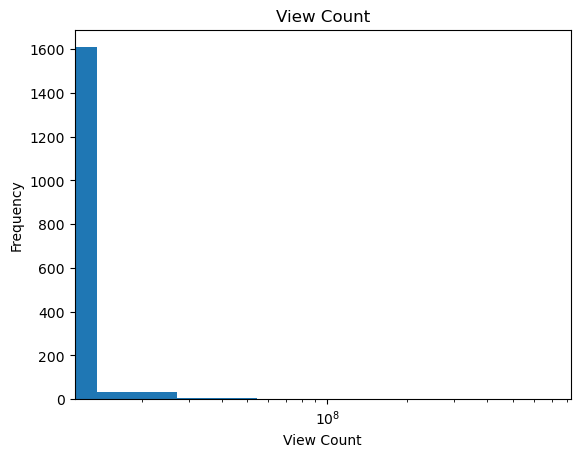

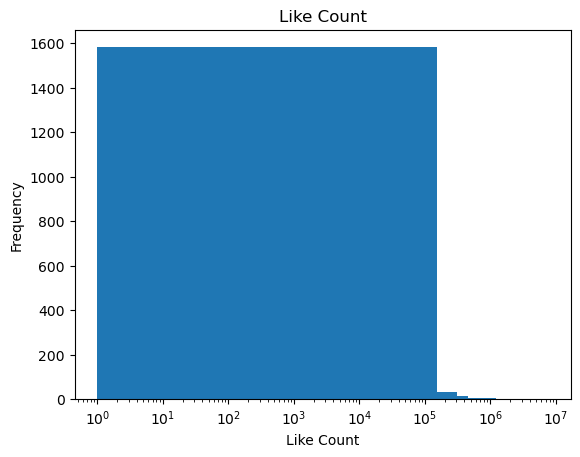

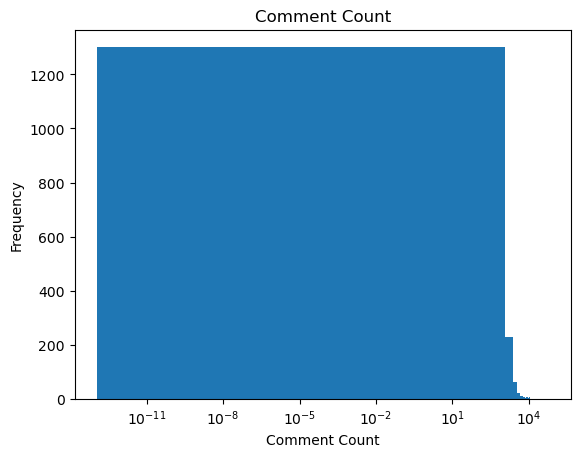

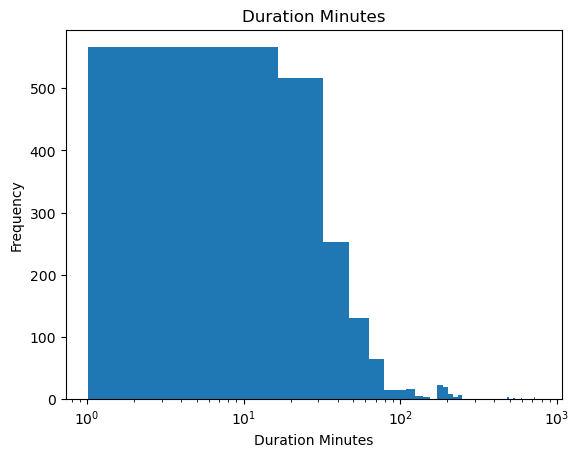

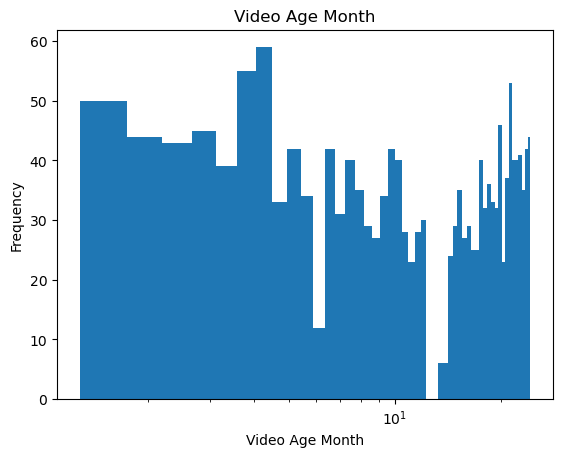

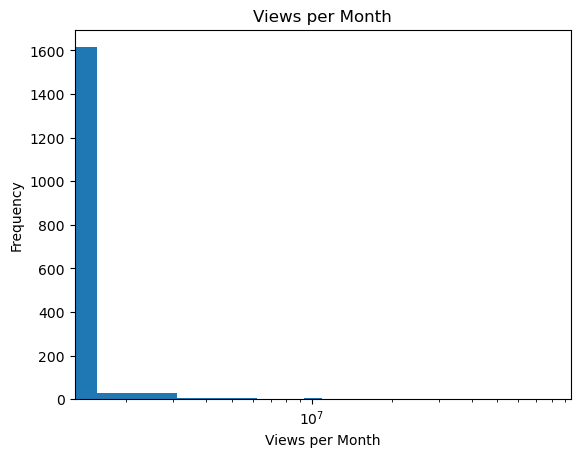

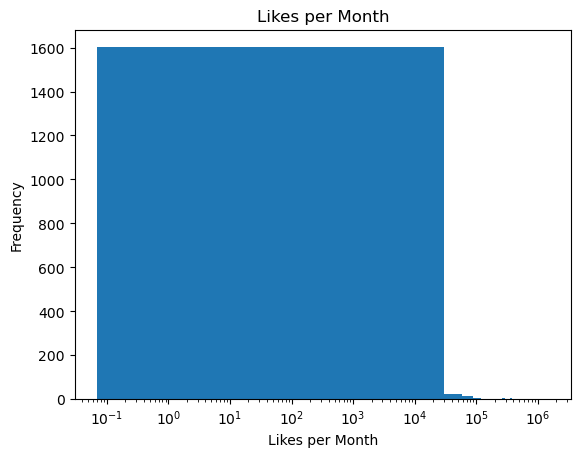

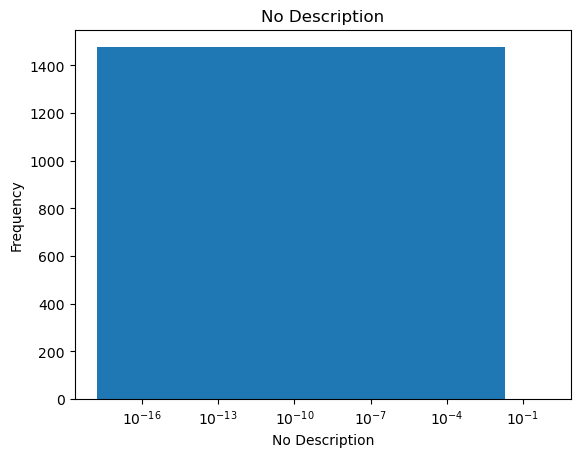

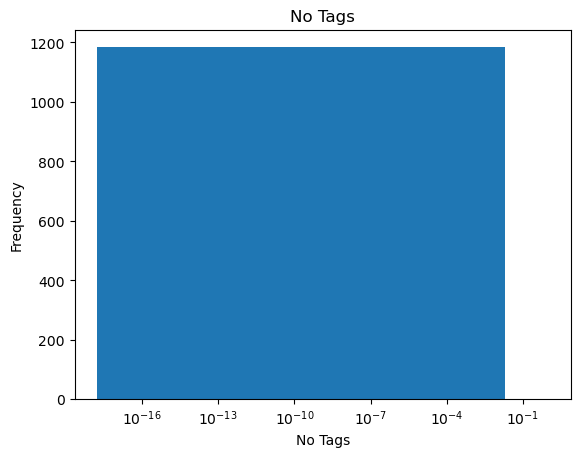

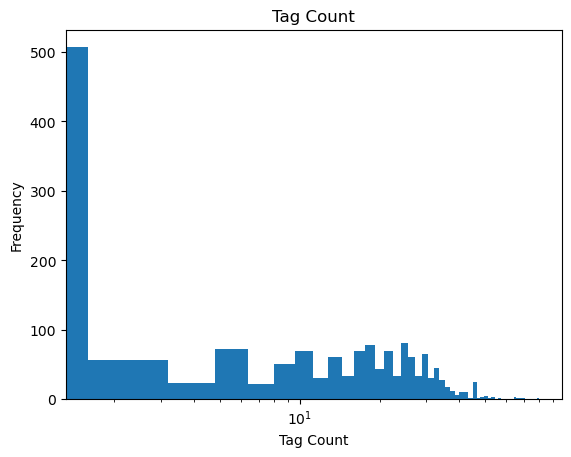

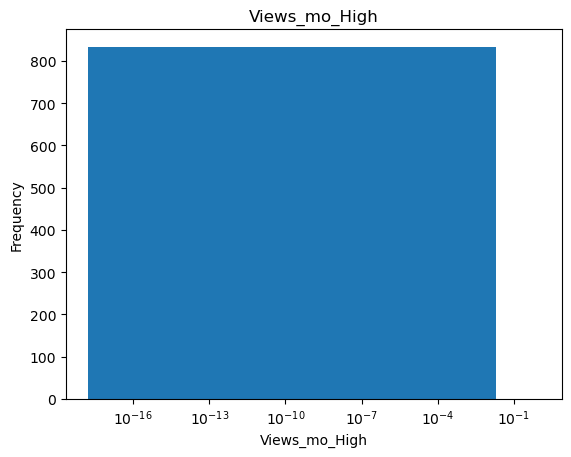

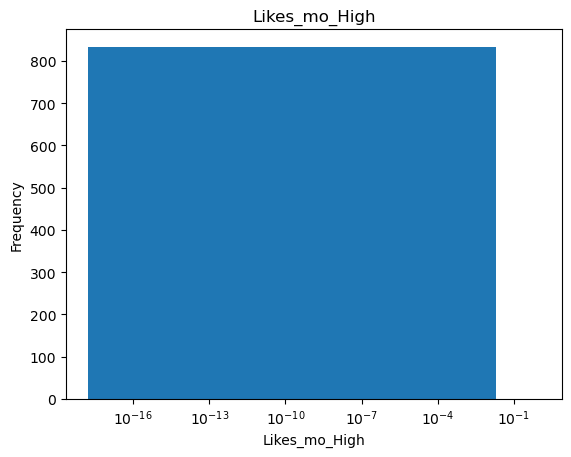

In [484]:
#log of select numerics
for col in data_vids2.select_dtypes("number").drop(columns=['Category ID','Dislike Count','Favorite Count',
                                                       'Video Age Days']):
    plt.figure()
    plt.hist(data_vids2[col], bins=50)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(col)
    #plt.yscale('log')
    plt.xscale('log')
    plt.show()

In [495]:
data_vids2.describe()

,Category ID,View Count,Like Count,Dislike Count,Favorite Count,Comment Count,Duration Minutes,Video Age Days,Video Age Month,Views per Month,Likes per Month,No Description,No Tags,Tag Count,Views_mo_High,Likes_mo_High
count,1665.000000,1.665000e+03,1.665000e+03,1665.0,1665.0,1665.000000,1665.000000,1665.000000,1665.000000,1.665000e+03,1.665000e+03,1665.000000,1665.000000,1665.000000,1665.00000,1665.00000
mean,22.502703,3.305193e+06,6.253805e+04,0.0,0.0,1064.111712,39.956937,379.350751,12.471916,3.513306e+05,8.576863e+03,0.112913,0.288889,14.258859,0.49970,0.49970
std,4.106327,2.138762e+07,2.963972e+05,0.0,0.0,2710.938675,70.601325,221.821463,7.292705,2.351012e+06,5.110479e+04,0.316581,0.453382,13.568058,0.50015,0.50015
min,1.000000,0.000000e+00,1.000000e+00,0.0,0.0,0.000000,1.020000,39.000000,1.280000,0.000000e+00,7.024634e-02,0.000000,0.000000,0.000000,0.00000,0.00000
25%,22.000000,3.517130e+05,7.605000e+03,0.0,0.0,244.000000,11.630000,166.000000,5.460000,4.294920e+04,7.822944e+02,0.000000,0.000000,0.000000,0.00000,0.00000
50%,24.000000,7.353280e+05,1.505000e+04,0.0,0.0,492.000000,24.020000,349.000000,11.470000,7.767380e+04,1.615871e+03,0.000000,0.000000,13.000000,0.00000,0.00000
75%,24.000000,1.771164e+06,3.475200e+04,0.0,0.0,1031.000000,39.820000,592.000000,19.460000,1.702778e+05,3.385755e+03,0.000000,1.000000,24.000000,1.00000,1.00000
max,30.000000,6.796701e+08,7.618578e+06,0.0,0.0,58882.000000,774.980000,737.000000,24.230000,7.772019e+07,1.475998e+06,1.000000,1.000000,80.000000,1.00000,1.00000


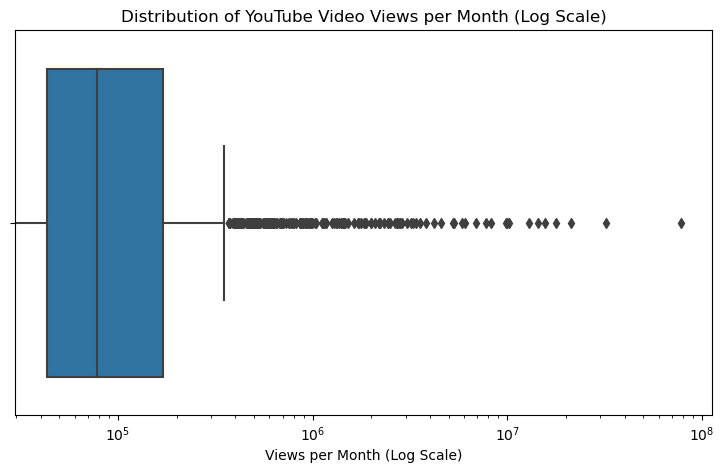

In [508]:
plt.figure(figsize=(9, 5))
sns.boxplot(x=data_vids2['Views per Month']) #1F6963 9A149D 9397D8
plt.xscale('log') 

# Add labels and title
plt.xlabel('Views per Month (Log Scale)')
plt.title('Distribution of YouTube Video Views per Month (Log Scale)')

# Show the plot
plt.show()

In [505]:
#video with max views per month
data_vids2[data_vids2['Views per Month'] == data_vids2['Views per Month'].max()]

,Video URL,Title,Description,Published At,Channel ID,Channel Title,Tags,Category ID,Default Language,Duration,View Count,Like Count,Dislike Count,Favorite Count,Comment Count,Comments Disabled,Ratings Disabled,Duration Minutes,Video Age Days,Video Age Month,Views per Month,Likes per Month,Category,No Description,No Tags,Month Published,Tag Count,Hour Published,Split Tags,Views_mo_High,Likes_mo_High
3242,https://www.youtube.com/watch?v=YoUsu3Vf2X8,Bebê dormiu:😂 #asmr #cleaning #faxina #mate...,,2024-04-03 22:33:45+00:00,UCz0iohvHkJsJteHcBR1HjSw,Anna Paula Souza,,22,en,PT1M1S,401163916,7618578,0,0,50517,False,False,1.02,157,5.16,7.772019e+07,1.475998e+06,People & Blogs,1,1,4,0,22,,1,1


/Users/jtumambing/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jtumambing/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jtumambing/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jtumambing/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jtumambing/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.


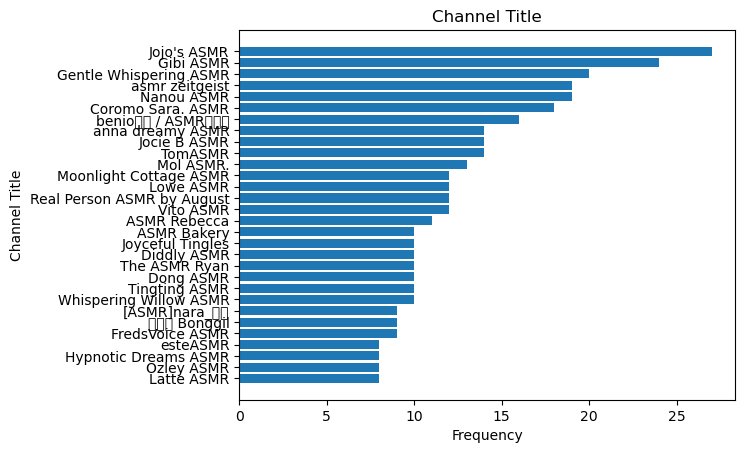

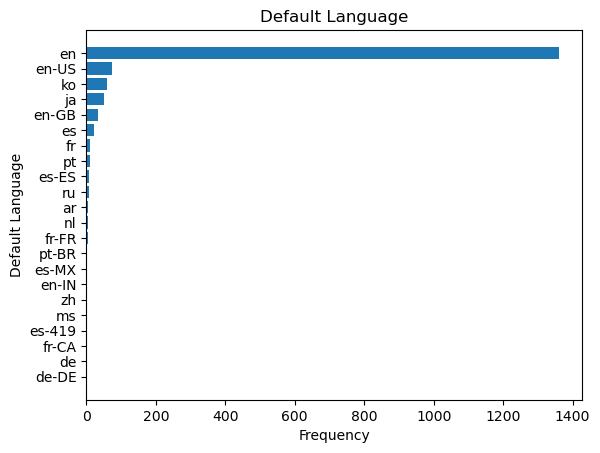

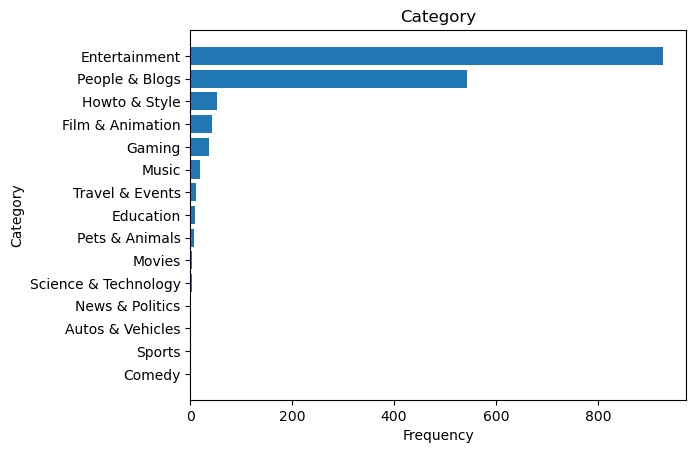

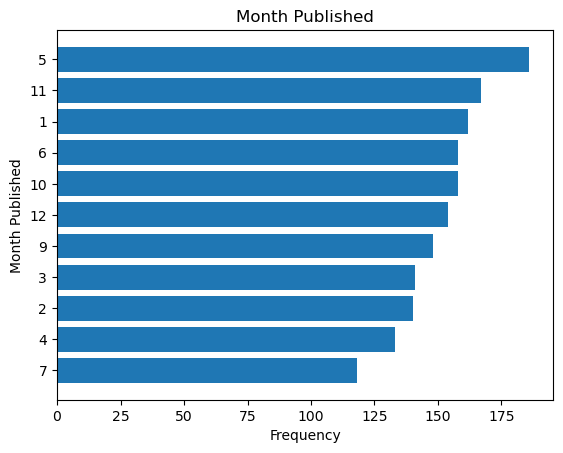

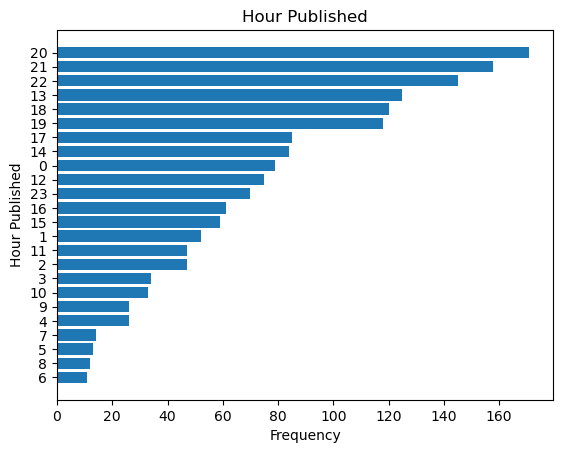

In [474]:
#checking barh, top 30 to reduce chart sizes
for col in data_vids2.select_dtypes("object").drop(columns=['Video URL','Title','Description','Channel ID', 'Tags',
                                                       'Duration','Split Tags']):
    # Get value counts
    value_counts = data_vids2[col].value_counts()
    
    # Select the top 30
    top_30 = value_counts.head(30)
    top_30_sorted = top_30.sort_values(ascending=True) #sort so that highest freq is top of barh
    
    plt.figure()
    plt.barh(top_30_sorted.index, top_30_sorted.values)  
    plt.xlabel('Frequency')
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [482]:
data_vids2['Default Language'].unique()

array(['en', 'ja', 'ru', 'es-ES', 'ko', 'ar', 'fr', 'es', 'en-US', 'ms',
       'nl', 'fr-CA', 'en-GB', 'pt-BR', 'es-MX', 'pt', 'zh', 'fr-FR',
       'de', 'en-IN', 'es-419', 'de-DE'], dtype=object)

733

## Reviewing Videos with 0 Likes (After Removing Shorts)

In [475]:
#read in original dataset as this may change with the updated 2nd version
data_vids = pd.read_csv('../data/data_vids_09.12.2024.csv', index_col=0)

In [476]:
#rechecking pop with 0 likes on videos
data_vids.loc[data_vids['Like Count'] == 0].sort_values(by='View Count', ascending = False)

,Video URL,Title,Description,Published At,Channel ID,Channel Title,Tags,Category ID,Default Language,Duration,View Count,Like Count,Dislike Count,Favorite Count,Comment Count,Comments Disabled,Ratings Disabled,Duration Minutes,Video Age Days,Video Age Month,Views per Month,Likes per Month,Category,No Description,No Tags,Month Published,Tag Count,Views_mo_High,Likes_mo_High
1450,https://www.youtube.com/watch?v=786qvk7jGfg,"Packing Order Mini Wallet, mirror,comb,.. | Mẫ...",,2023-04-25 07:15:08+00:00,UC2hqpOywcs4s8MjBCPYno8g,Mẫn Mẫn Miladen Official,,22,en,PT1M1S,13744496,0,0,0,5146,False,False,1.02,501,16.47,834454.597472,0.0,People & Blogs,1,1,4,0,1,0
269,https://www.youtube.com/watch?v=h4wgarBVRCk,I WAITED FOR THREE MONTHS TO GET INTO THIS PLA...,*S P E C I A L T H A N K S*\nsalon info: 吉祥寺【...,2022-10-03 19:54:46+00:00,UC82mWqRZlB45ESh-rIPfJOQ,ASMR Twix,,24,en-US,PT55M6S,7112571,0,0,0,2008,False,False,55.10,705,23.18,306866.242908,0.0,Entertainment,0,1,10,0,1,0
892,https://www.youtube.com/watch?v=2as_rnIvasA,Makan Makanan Hitam⚫️ #asmr #mukbang #blackfood,,2023-01-06 06:19:05+00:00,UCPB5FCNjfLiozXYavdKbDTw,Mukbang Bersama Bent,,22,en,PT1M1S,5031108,0,0,0,4060,False,False,1.02,610,20.05,250868.090164,0.0,People & Blogs,1,1,1,0,1,0
1739,https://www.youtube.com/watch?v=ZOkZAeTnODw,Doing Your Makeup in 60 Seconds 👁️👄👁️ ASMR #as...,doing your makeup in 60 seconds for school! Su...,2023-06-01 18:30:21+00:00,UCBmEi75U56KU6ZphFbXiF3g,edafoxx ASMR,"asmr, triggers, tingles, pov, shorts, shorts v...",24,en,PT1M1S,4495852,0,0,0,2465,False,False,1.02,464,15.25,294717.309626,0.0,Entertainment,0,0,6,18,1,0
1080,https://www.youtube.com/watch?v=3qFG05rT8zM,pov doing your makeup in 60 seconds ASMR #asmr...,psst.. let me do your makeup real quick! #asmr...,2023-02-01 19:37:20+00:00,UCBmEi75U56KU6ZphFbXiF3g,edafoxx ASMR,"asmr, shorts, short, asmr short, sleep, trigge...",24,en,PT1M1S,4111707,0,0,0,2607,False,False,1.02,584,19.20,214151.406250,0.0,Entertainment,0,0,2,12,1,0
1315,https://www.youtube.com/watch?v=879RDBLwwpI,Rainbow Satisfying Video l ASMR Mixing Candy &...,Rainbow Satisfying Video l ASMR Mixing Candy &...,2023-03-18 15:53:03+00:00,UCP5mpjpmtQf-i6qapLQrW3g,AniMeow TV,"slime, balloon slime, making slime with balloo...",24,en-US,PT5M56S,2080062,0,0,0,24,False,False,5.93,539,17.72,117381.358998,0.0,Entertainment,0,0,3,34,1,0
538,https://www.youtube.com/watch?v=4BIU4Q2FPI4,ASMR | Plucking Your Negative Energy 🔮 부정적 에너지 뽑기,#ASMR \n\n👕 [Fashion & Cosmetic Info(의상 및 화장품 ...,2022-11-06 13:00:02+00:00,UCRUb1Iq2qbcmvt7AWdW8wjA,Judy asmr,"asmr, korean asmr, whispering, talking asmr, 한...",24,en,PT28M2S,2072096,0,0,0,570,False,False,28.03,671,22.06,93928.842524,0.0,Entertainment,0,0,11,19,1,0
3077,https://www.youtube.com/watch?v=8oCzcSDqpyI,ASMR. POV: you won a relaxation treatment pack...,0:00 welcome!\n0:46 she's here\n0:58 aromather...,2024-03-22 19:00:51+00:00,UCX_hJTGOVZJdFweuaJ40uWQ,valoulette,,24,en,PT16M45S,993965,0,0,0,1244,False,False,16.75,169,5.56,178894.095168,0.0,Entertainment,0,1,3,0,1,0
1455,https://www.youtube.com/watch?v=4w0_Sgmy35w,【ASMR】イヤホンマイクでぞくぞわ50種類の音！💘 | 50ASMRsounds,最初は100soundsASMRを撮ろうと思ったけど途中で挫折して50種類にしました！！(ﾉ...,2023-04-06 13:32:20+00:00,UCPQskNoAgq538oAoILNe1Ew,ちゅーるASMR,,22,en,PT3M2S,598378,0,0,0,126,False,False,3.03,520,17.10,35001.277244,0.0,People & Blogs,0,1,4,0,0,0
2717,https://www.youtube.com/watch?v=rqD7m45PFSM,"[ASMR] FAST doctor check-up (eyes, ears, scalp...",Hiiii my friends 💚💚 \nI hope you are all amazi...,2024-01-19 11:08:31+00:00,UCDH5_bVf-1QO43Q4cV_zHhQ,MaggyASMR,"asmr, fast asmr, fast and aggressive, doctor c...",24,en,PT19M17S,587273,0,0,0,438,False,False,19.28,232,7.63,76995.202945,0.0,Entertainment,0,0,1,12,0,0


In [477]:
data_vids.loc[data_vids['Like Count'] == 0].shape

#25 vids - but will probably be more later

(25, 29)

### Decision
Remove videos with 0 likes

In [478]:
data_vids.shape

#1690 x 29

#In 2nd edition - added hour and split tags here, replaced months - 2 addtl cols check out

(1690, 29)

In [479]:
#checking difference between original and 2nd edition datasets

In [480]:
data_vids.head(0).T

""
Video URL
Title
Description
Published At
Channel ID
Channel Title
Tags
Category ID
Default Language
Duration


In [481]:
data_vids2.head(0).T

""
Video URL
Title
Description
Published At
Channel ID
Channel Title
Tags
Category ID
Default Language
Duration
